In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
!tar xvf drive/My\ Drive/ssh.tar.gz # /path/to/ssh.tar.gz

ssh-colab/
ssh-colab/colab
ssh-colab/colab.pub
ssh-colab/config


In [9]:
!cp ssh-colab/* /root/.ssh/ && rm -rf ssh-colab
!chmod 700 /root/.ssh -R
!touch /root/.ssh/known_hosts
!ssh-keyscan github.com > /root/.ssh/known_hosts
!chmod 644 /root/.ssh/known_hosts

In [31]:
# type following commands in the prompt
#!ssh-add /root/.ssh/colab
#!git clone --recursive git@github.com:Jokoe66/TianchiTrafficEstimation.git
!ssh-agent /bin/bash

bash: cannot set terminal process group (122): Inappropriate ioctl for device
bash: no job control in this shell
]0;root@6a70e2574a48: /contentroot@6a70e2574a48:/content# ssh-add /root/.ssh/colabssh-add /root/.ssh/colab
/root/.ssh/colabssh-add: No such file or directory
Enter passphrase for /root/.ssh/colab: colab
Identity added: /root/.ssh/colab (/root/.ssh/colab)
]0;root@6a70e2574a48: /contentroot@6a70e2574a48:/content# 
]0;root@6a70e2574a48: /contentroot@6a70e2574a48:/content# 
]0;root@6a70e2574a48: /contentroot@6a70e2574a48:/content# ssh-add -l
2048 SHA256:icmxMN9P2/nAzlaymNd8fuoFlF3oO3ENbHv8sFQnpxU /root/.ssh/colab (RSA)
]0;root@6a70e2574a48: /contentroot@6a70e2574a48:/content# git@github.com:Jokoe66/TianchiTrafficEstimation.git
bash: git@github.com:Jokoe66/TianchiTrafficEstimation.git: No such file or directory
TrafficEstimation.git
Cloning into 'TianchiTrafficEstimation'...
remote: Enumerating objects: 242, done.
remote: Counting objects: 100% (242/242), done.
remote: 

In [40]:
%cd /content/TianchiTrafficEstimation/lib/lanedet
!pip install -r requirements.txt

In [25]:
%cd /content/TianchiTrafficEstimation/lib/mmdetection/
!pip install -r requirements/build.txt
!pip install mmcv-full==latest+torch1.5.0+cu101 -f https://openmmlab.oss-accelerate.aliyuncs.com/mmcv/dist/index.html
!pip install -e .

/content/TianchiTrafficEstimation/lib/mmdetection
Obtaining file:///content/TianchiTrafficEstimation/lib/mmdetection
     |████████████████████████████████| 2.1MB 2.8MB/s 
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=57c8a8f33df3752e872659729e46903d57e211c34024e554aa49a8d750af311c
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built terminaltables
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0
  Running setup.py develop for mmdet


In [6]:
!cat /content/TianchiTrafficEstimation/lib/mmdetection/configs/cascade_rcnn/README.md|grep mask

|    Backbone     |  Style  | Lr schd | Mem (GB) | Inf time (fps) | box AP | mask AP | Download |
|    R-50-FPN     |  caffe  |   1x    |  5.9     |                | 41.2   | 36.0    | [model](https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/cascade_rcnn/cascade_mask_rcnn_r50_caffe_fpn_1x_coco/cascade_mask_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.412__segm_mAP-0.36_20200504_174659-5004b251.pth) &#124; [log](https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/cascade_rcnn/cascade_mask_rcnn_r50_caffe_fpn_1x_coco/cascade_mask_rcnn_r50_caffe_fpn_1x_coco_20200504_174659.log.json) |
|    R-50-FPN     | pytorch |   1x    |  6.0     |  11.2          | 41.2   | 35.9    | [model](https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/cascade_rcnn/cascade_mask_rcnn_r50_fpn_1x_coco/cascade_mask_rcnn_r50_fpn_1x_coco_20200203-9d4dcb24.pth) &#124; [log](https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/cascade_rcnn/cascade_mask_rcnn_r50_f

/content/TianchiTrafficEstimation/lib/mmdetection/mmdet/apis/inference.py:108: UserWarning: We set use_torchvision=True in CPU mode.
  warnings.warn('We set use_torchvision=True in CPU mode.')


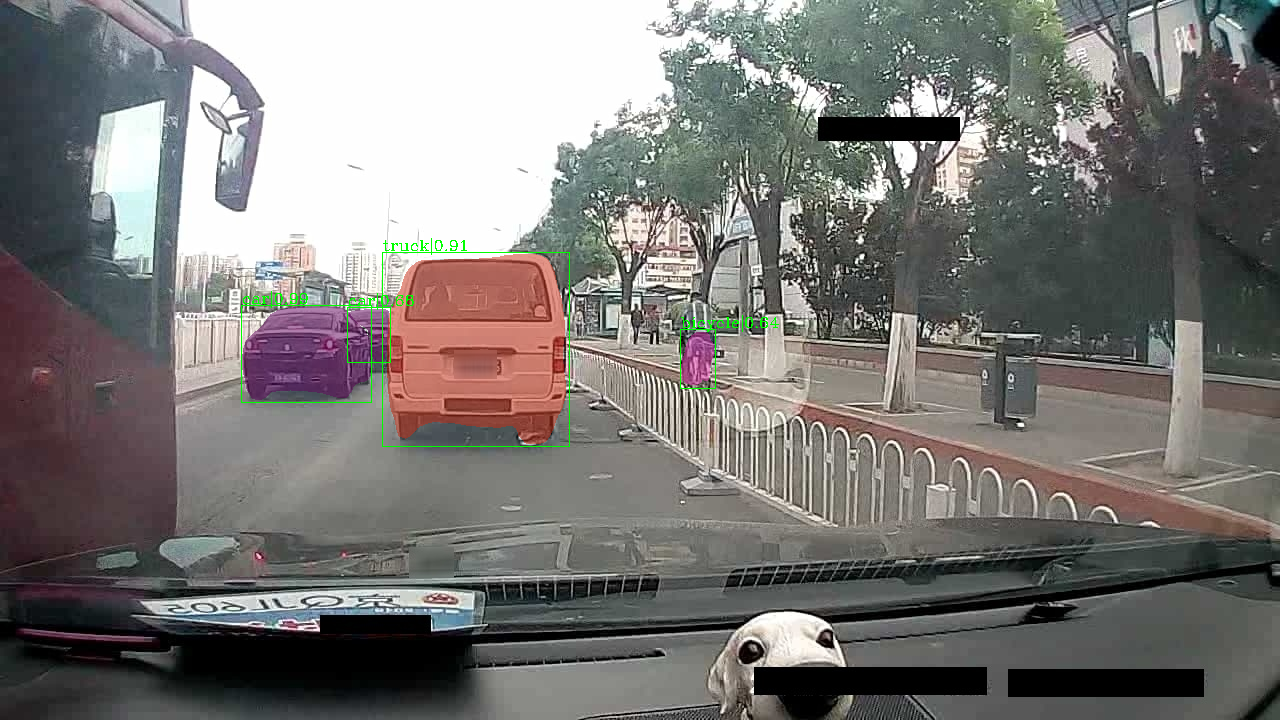

In [99]:
# vehicle detection
from PIL import Image
import numpy as np

from mmdet.apis import inference

config = ('/content/TianchiTrafficEstimation/lib/mmdetection/configs/'
          'cascade_rcnn/cascade_mask_rcnn_r50_fpn_1x_coco.py')
checkpoint = ('https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection'
              '/v2.0/cascade_rcnn/cascade_mask_rcnn_r50_fpn_20e_coco/'
              'cascade_mask_rcnn_r50_fpn_20e_coco_bbox_mAP-0.419__segm_mAP-'
              '0.365_20200504_174711-4af8e66e.pth')

detector = inference.init_detector(config, checkpoint=checkpoint, device='cpu')

img_file = '/content/TianchiTrafficEstimation/data/trainingset_examples/000006/1.jpg'
box_out, seg_out = inference.inference_detector(detector, img_file)

vehicle_labels = ['car', 'motorcycle', 'bus', 'truck', 'bicycle',]
vehicle_ids = [detector.CLASSES.index(label) for label in vehicle_labels]

box_result = [np.empty((0, 5)) for i in range(len(box_out))]
seg_result = [[] for i in range(len(box_out))]
for id in vehicle_ids:
    box_result[id] = box_out[id]
    seg_result[id] = seg_out[id]

img = detector.show_result(img_file, 
                           (box_result, seg_result), 
                           score_thr=0.5)[..., ::-1]
img = Image.fromarray(img)
img

/content/TianchiTrafficEstimation/lib


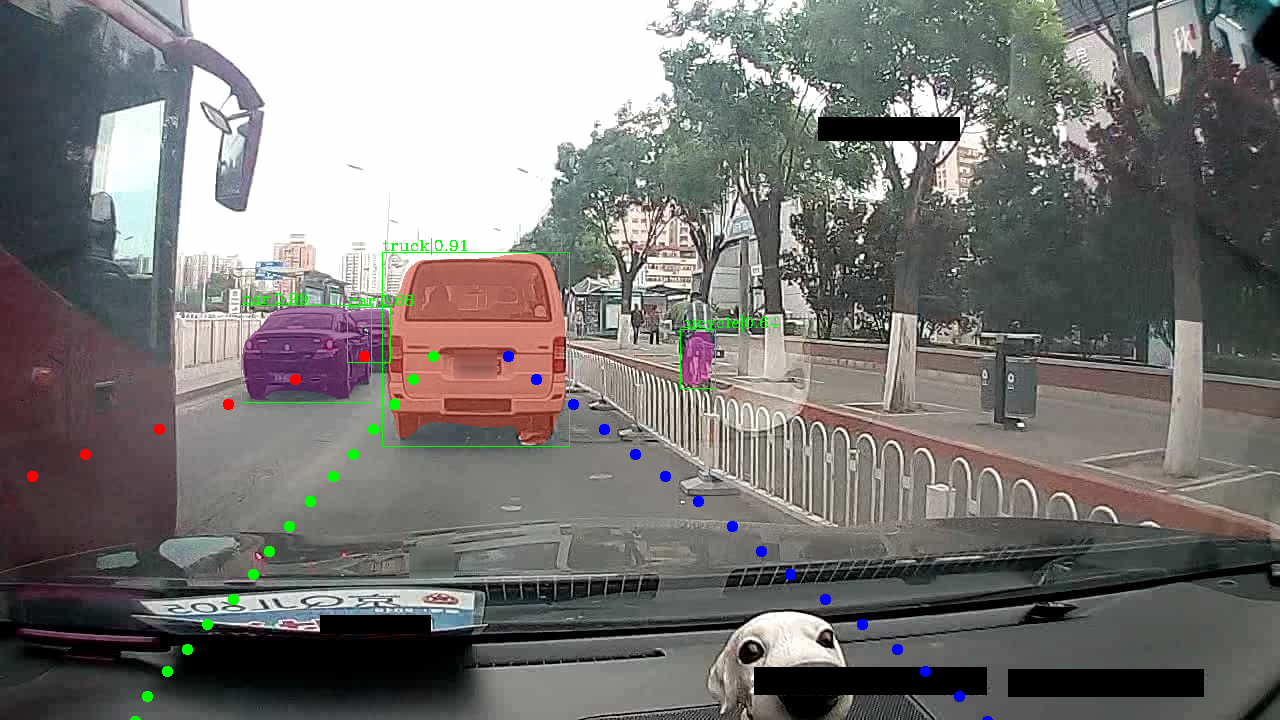

In [100]:
# lanedet demo
%cd /content/TianchiTrafficEstimation/lib
from lanedet.utils.config import Config
from lanedet.inference import init_model, inference_model, show_result

config_file = 'lanedet/configs/culane.py' #/path/to/config
config = Config.fromfile(config_file)
config.test_model = '/content/drive/My Drive/culane_18.pth' #/path/to/model_weight

model = init_model(config, 'cpu')
result = inference_model(model, img_file)
img = show_result(img, result)
#img.save(/path/to/output_image)
img

/content/TianchiTrafficEstimation/lib/utils/geometry.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  slope = rise / float(run)


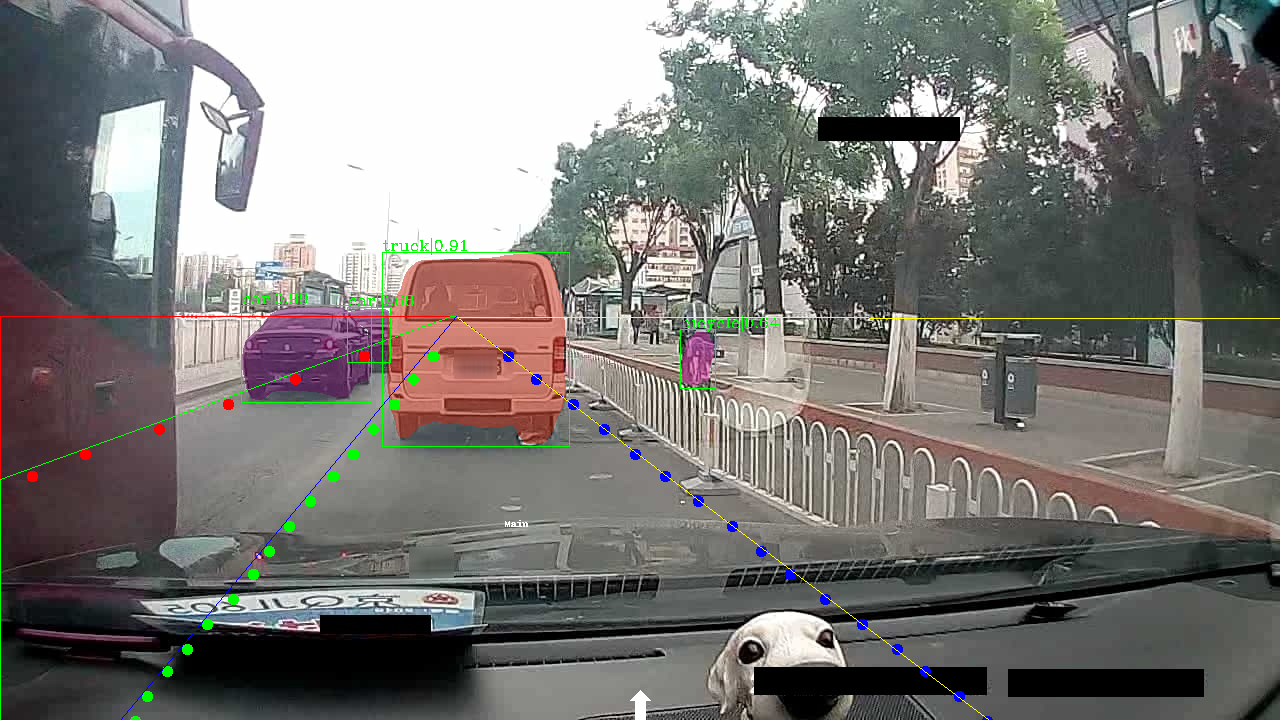

In [101]:
# lane detection and polygon generation
from utils.visualize import show_lanes
from utils.geometry import split_rectangle, point_in_polygon

w, h = img.size

lines = [line[line[:, 0] > 0] for line in result if len(line[line[:, 0] > 0]) > 2]
lanes = split_rectangle(lines, (w, h))
main_lane = [point_in_polygon([w / 2, h], _) for _ in lanes].index(True)

show_lanes(img, lanes, main_lane)

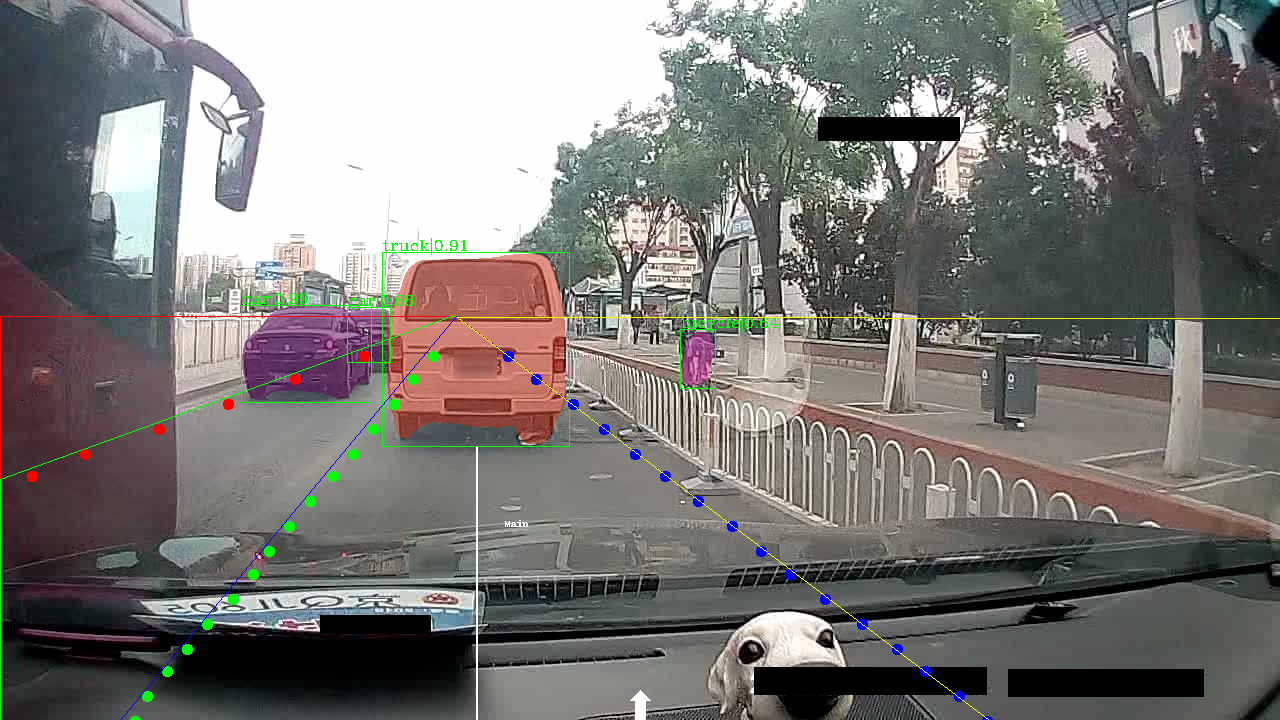

In [103]:
# show distance from closest vehicle 
from PIL import ImageDraw
draw = ImageDraw.Draw(img)

vehicles = np.vstack(box_result)
vehicles = vehicles[vehicles[:, -1] >= 0.5]

bottom_centers = vehicles[:, 2:4]
bottom_centers[:, 0] -= 0.5 * (vehicles[:, 2] - vehicles[:, 0])

inside_main_lane = np.hstack(
    [point_in_polygon(bc, lanes[main_lane]) for bc in bottom_centers])

inside_bottom_centers = bottom_centers[inside_main_lane]

closest_inside_bottom_centers = inside_bottom_centers[
    inside_bottom_centers[:, 1] == inside_bottom_centers[:, 1].max()]

for ibc in closest_inside_bottom_centers:
    draw.line([(ibc[0], ibc[1]), (ibc[0], h)],
              fill=(255, 255, 255), width=2)
img

/content/TianchiTrafficEstimation/lib


/content/TianchiTrafficEstimation/lib/utils/geometry.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  slope = rise / float(run)


(-0.1, 10.1, -10.1, 0.1)

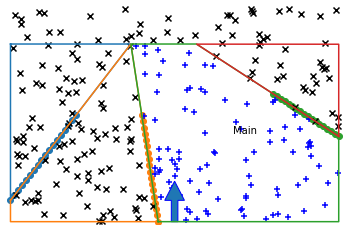

In [2]:
# split image with lanes simulation
%cd /content/TianchiTrafficEstimation/lib
import matplotlib.pyplot as plt
import numpy as np

from utils.geometry import point_in_polygon, split_rectangle

w = h = 10.
ls = [(-2, 9), (10, -35), (1, -4)] # List[(slope, intercept)]
lines = []
xs = [np.linspace(0, 2, 18), np.linspace(4, 4.5, 18), np.linspace(8, 10, 18)]
# test cases
# ls = []; xs = []
# ls = ls[:2]; xs = xs[:2]
# ls = ls[:1]; xs = xs[:1]
# ls = ls[1:2]; xs = xs[1:2]
# ls = ls[2:3]; xs = xs[2:3]
for i, l in enumerate(ls):
    y = xs[i] * l[0] + l[1]
    lines.append(np.stack([xs[i], y], -1))

for line in lines:
    plt.scatter(line[:, 0], -line[:, 1])

lanes = split_rectangle(lines, (w, h))
main_lane = [point_in_polygon([w / 2, h], _) for _ in lanes].index(True)

for i, lane in enumerate(lanes):
    lane = np.vstack([lane, lane[None, 0]])
    plt.plot(lane[:, 0], -lane[:, 1])
plt.arrow(w / 2, -h, dx=0., dy=1, width=0.2, ec='blue')
plt.text(lanes[main_lane].mean(0)[0], -lanes[main_lane].mean(0)[1], s='Main')

# point-in-lane test
for p in np.random.uniform(0, w, (250, 2)):
    inside = point_in_polygon(p, lanes[main_lane])
    color = 'blue' if inside else 'black'
    marker = '+' if inside else 'x'
    plt.scatter(p[0], -p[1], marker=marker, color=color)

plt.xlim(- 0.1, w + 0.1)
plt.ylim(- h - 0.1,  0.1)
plt.axis('off')